<a href="https://colab.research.google.com/github/AlbertoVentura8/AnalisisDataset/blob/main/MarchMad_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Voy a cargar las librerías que vamos a usar a lo largo del EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Hacemos la carga del dataset. Dataset previamente subido a GoogleColab.
March_Madness_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TFM/March_Madness_df.csv')

In [4]:
# Para ver que la carga ha sido correcta, cargamos el head del mismo
March_Madness_df.head()

,Unnamed: 0,Season,Team Name,Conference,Historical Conference,Adjusted Temo,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Avg Possession Length (Offense),Avg Possession Length (Defense),...,SGDR,PGDR,Current coach,Active Coaching Length,Active Coaching Length Index,Net Rating,Seed,Region,Post-Season Tournament,Post-Season Tournament Sorting Index
0,4,2019,Virginia,Atlantic Coast Conference (ACC),Atlantic Coast Conference (ACC),59.4,123.4,89.2,21.0,18.8,...,17.84,13.59,Tony Bennett,14 years,15.0,34.2,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5
1,6,2021,Baylor,Big 12 Conference,Big 12 Conference,67.4,125.0,91.1,17.0,17.6,...,16.34,11.65,Scott Drew,20 years,21.0,33.9,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5
2,7,2015,Wisconsin,Big Ten Conference (Big 10),Big Ten Conference (Big 10),58.7,129.0,95.2,21.8,18.3,...,11.68,12.40,Greg Gard,8 years,9.0,33.8,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5
3,8,2018,Villanova,Big East Conference,Big East Conference,68.7,127.8,94.0,17.9,16.6,...,17.28,13.94,Kyle Neptune,1 years,2.0,33.8,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5
4,9,2011,Ohio State,Big Ten Conference (Big 10),Big Ten Conference (Big 10),63.8,125.0,91.5,17.1,20.1,...,16.02,14.77,Chris Holtmann,6 years,7.0,33.5,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5


**Vamos a empezar este bloque de Análisis Exploratorio del Dataset (EDA)**

In [11]:
#Vamos a ver las columnas del dataset, y el tipo de datos que contienen, en su mayoría, son datos numéricos, excepto alguna columna de texto
March_Madness_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6966 entries, 0 to 6965
Data columns (total 76 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            6966 non-null   int64  
 1   Season                                6966 non-null   int64  
 2   Team Name                             6966 non-null   object 
 3   Conference                            6966 non-null   object 
 4   Historical Conference                 6966 non-null   object 
 5   Adjusted Temo                         6966 non-null   float64
 6   Adjusted Offensive Efficiency         6966 non-null   float64
 7   Adjusted Defensive Efficiency         6966 non-null   float64
 8   Avg Possession Length (Offense)       6966 non-null   float64
 9   Avg Possession Length (Defense)       6966 non-null   float64
 10  eFGPct                                6966 non-null   float64
 11  TOPct            

In [17]:
# Vamos a tener una vista general de todas las variables, y de los principales puntos de cada una: Media, Desviación, Mínimo, Cuartiles y Máximo.
March_Madness_df.describe()

,Unnamed: 0,Season,Adjusted Temo,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Avg Possession Length (Offense),Avg Possession Length (Defense),eFGPct,TOPct,ORPct,...,SGOR,PGOR,CenterDR,PFDR,SFDR,SGDR,PGDR,Active Coaching Length Index,Net Rating,Post-Season Tournament Sorting Index
count,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,...,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000
mean,3981.479472,2014.633218,66.443526,103.669825,103.690970,17.715030,17.649699,49.554195,19.565023,30.544728,...,11.372326,8.260563,26.282044,24.030046,19.346767,16.093491,14.086440,5.771031,-0.021146,4.942148
std,2296.611804,5.758004,3.212785,7.376295,6.433883,1.444842,0.997079,3.606503,3.912690,4.563876,...,4.538484,3.618828,4.569481,4.119360,3.652779,3.301386,3.371309,5.356518,11.975658,0.449245
min,4.000000,2005.000000,51.600000,71.500000,84.100000,0.000000,0.000000,0.000000,11.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-46.100000,1.000000
25%,1988.250000,2010.000000,64.400000,98.600000,99.300000,16.900000,17.200000,47.558652,17.776649,27.591256,...,8.070000,5.860000,23.440000,21.512500,16.970000,13.980000,12.150000,2.000000,-8.600000,5.000000
50%,3990.500000,2015.000000,66.400000,103.600000,103.900000,17.700000,17.600000,49.632130,19.317729,30.726278,...,10.780000,7.700000,26.040000,23.880000,19.160000,15.910000,13.810000,4.000000,-0.800000,5.000000
75%,5974.750000,2020.000000,68.600000,108.700000,108.400000,18.500000,18.100000,51.676750,21.007300,33.704075,...,14.000000,10.017500,28.880000,26.440000,21.590000,17.940000,15.730000,8.000000,8.400000,5.000000
max,7949.000000,2024.000000,89.700000,129.000000,125.000000,23.800000,21.100000,60.344800,100.000000,45.256700,...,39.840000,99.980000,99.960000,99.960000,52.900000,80.800000,99.970000,39.000000,34.200000,5.000000


In [18]:
# Vamos a comprobar que la limpieza está hecha correctamente, y que no tenemos valores nulos.
March_Madness_df.isna().sum()

,0
Unnamed: 0,0
Season,0
Team Name,0
Conference,0
Historical Conference,0
...,...
Net Rating,0
Seed,0
Region,0
Post-Season Tournament,0


In [27]:
# Viendo que está todo en orden para empezar a trabajar, vamos con una vista un poco más estadística del dataset
March_Madness_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6966.0,3981.479472,2296.611804,4.0,1988.25,3990.50,5974.75,7949.00
Season,6966.0,2014.633218,5.758004,2005.0,2010.00,2015.00,2020.00,2024.00
Adjusted Temo,6966.0,66.443526,3.212785,51.6,64.40,66.40,68.60,89.70
Adjusted Offensive Efficiency,6966.0,103.669825,7.376295,71.5,98.60,103.60,108.70,129.00
Adjusted Defensive Efficiency,6966.0,103.690970,6.433883,84.1,99.30,103.90,108.40,125.00
...,...,...,...,...,...,...,...,...
SGDR,6966.0,16.093491,3.301386,0.0,13.98,15.91,17.94,80.80
PGDR,6966.0,14.086440,3.371309,0.0,12.15,13.81,15.73,99.97
Active Coaching Length Index,6966.0,5.771031,5.356518,1.0,2.00,4.00,8.00,39.00
Net Rating,6966.0,-0.021146,11.975658,-46.1,-8.60,-0.80,8.40,34.20


In [32]:
# Seleccionar solo las columnas numéricas
numerical_columns = March_Madness_df.select_dtypes(include=['number'])

# Calcular el sesgo (skew) para todas las columnas numéricas
skew_values = numerical_columns.skew()

# Ordenar los valores de sesgo en orden descendente
sorted_skew_values = skew_values.sort_values(ascending=False)

# Mostrar las columnas con las mayores desviaciones
print(sorted_skew_values)

OppStlRate      21.027473
OppBlockPct     19.148628
TOPct           12.507153
NSTRate         10.715090
OppFG3Pct        9.664458
                  ...    
SGHeight       -22.369815
CenterHeight   -22.677032
AvgHeight      -22.868543
SFHeight       -23.130517
PFHeight       -23.390659
Length: 68, dtype: float64


Esto, nos informa de que variables son las menos simétricas. Las que tienen un skew positivo, tienen más valores hacia la derecha, y los valores negativos hacia la izquierda.

In [40]:
# Vemos un pequeño resumen de los valores más altos y más bajos de correlación. A mayor proximidad a 1, significa que si incrementan, el Net Rating lo hará también, y cuanto mayor proximidad a -1, si aumenta esa variable, el Net Rating disminuirá
numerical_columns.corr()['Net Rating'].sort_values(ascending=False)

,Net Rating
Net Rating,1.000000
AdjEM,0.999994
AdjOE,0.885452
Adjusted Offensive Efficiency,0.885433
OE,0.671012
...,...
OppFG2Pct,-0.490321
DE,-0.546649
AdjDE,-0.846187
Adjusted Defensive Efficiency,-0.846214


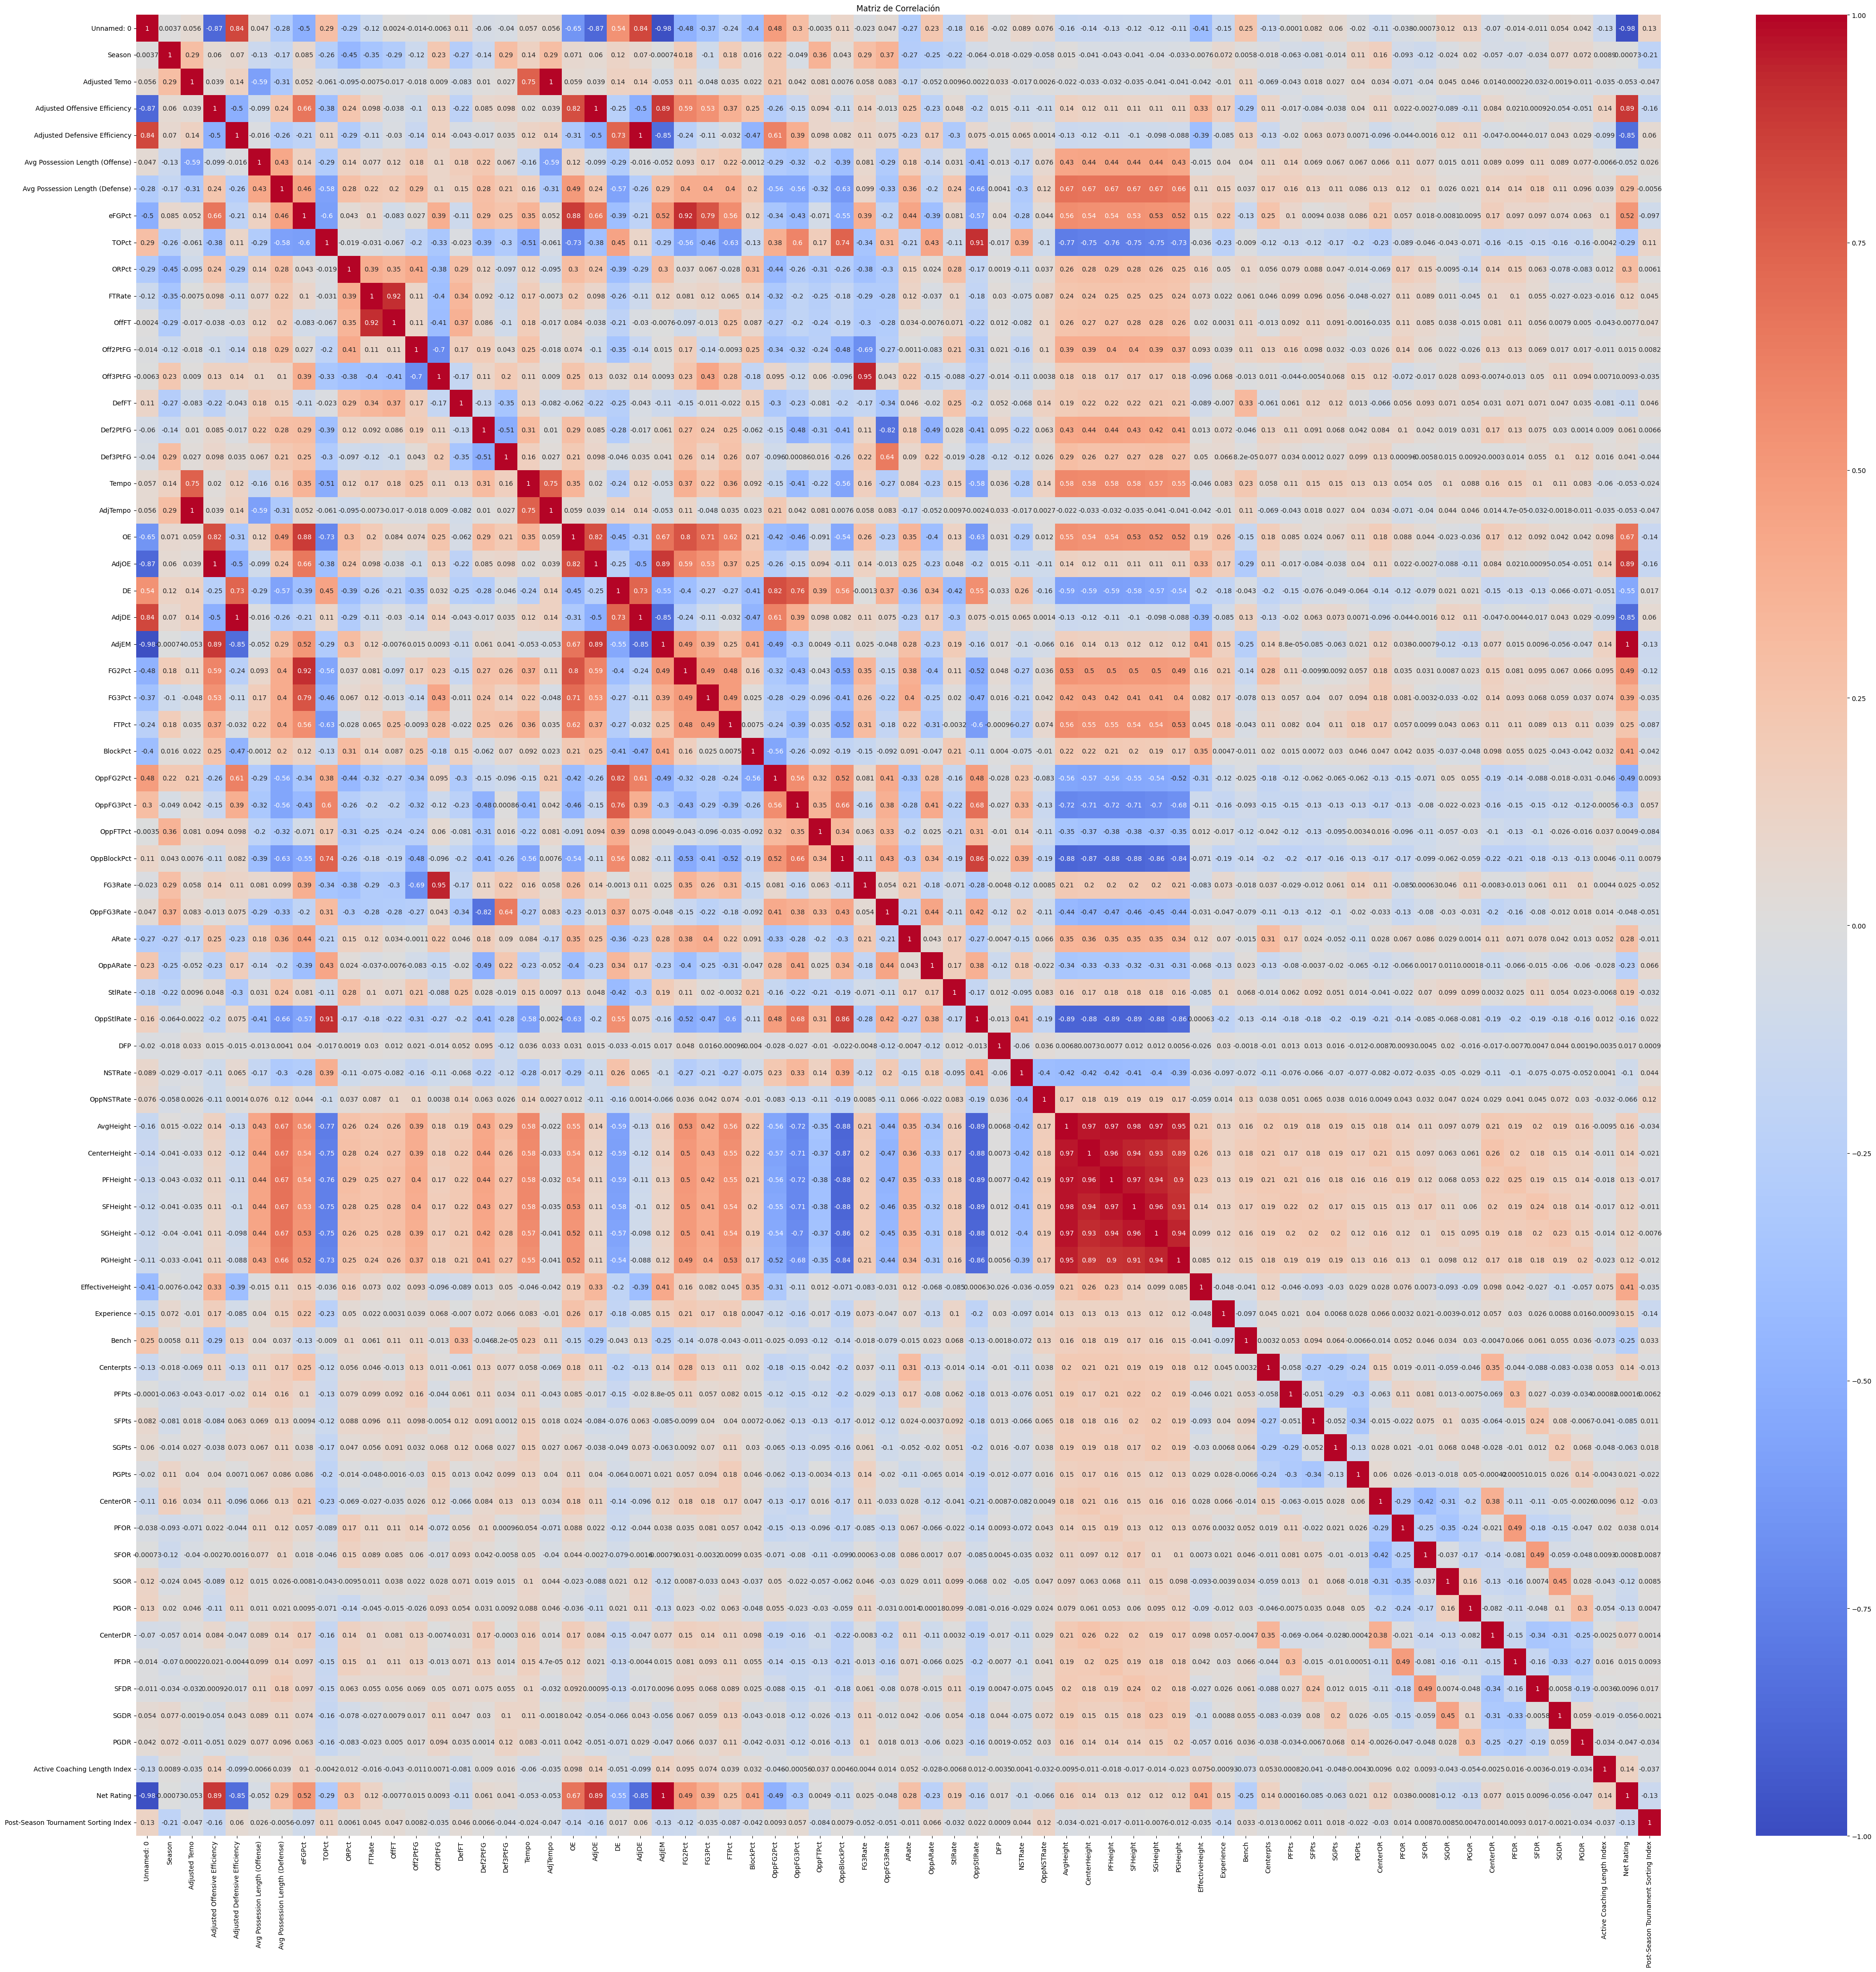

In [38]:
# Calcular la matriz de correlación
Matriz_correlacion = numerical_columns.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(52, 50))

# Crear el mapa de calor
sns.heatmap(Matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Ajustar el título y mostrar el gráfico
plt.title('Matriz de Correlación')
plt.show()